## Import modules and load dataset

In [347]:
# Imports required modules
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as pltt 
import seaborn as sns

# Used for scaling data
from sklearn.preprocessing import StandardScaler

# Used for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Load dataset
red_wines = pd.read_csv('winequality-red.csv', delimiter=';')


#### Utility Functions

In [348]:
# Scales dataset using standardScaler and returns to caller
def scaleData(dataset_features):
    std_scaler = StandardScaler().fit_transform(dataset_features)
    std_df = pd.DataFrame(std_scaler, columns=dataset_features.columns)
    
    return std_df


## Preparing the data

In [349]:
# inspect dataset
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


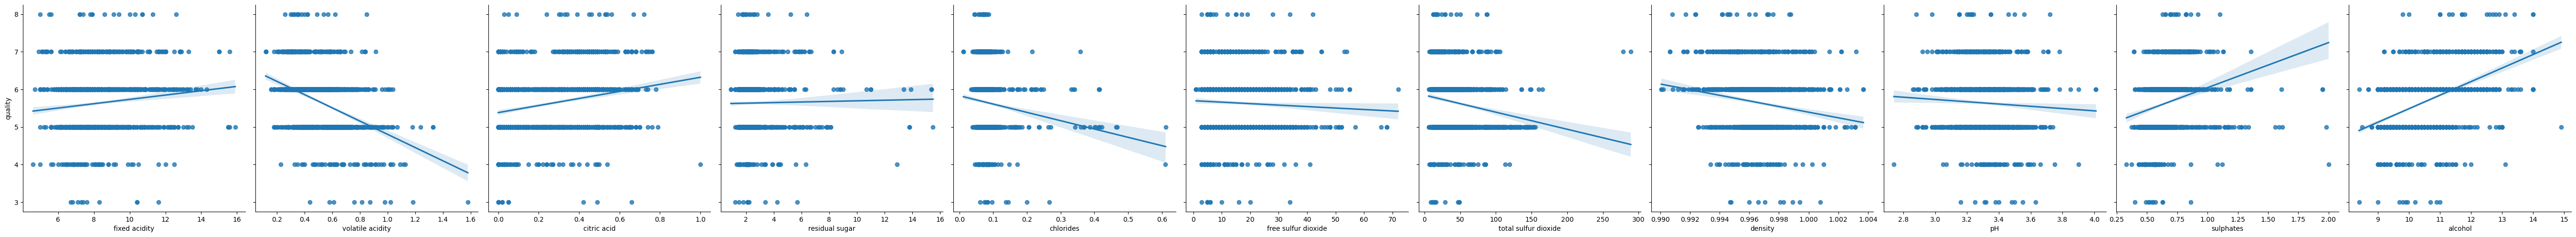

In [350]:
#Regression plot of each feature's relationship to label values

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

sns.pairplot(red_wines, x_vars=features, y_vars='quality', height=5, aspect=1, kind='reg')

In [351]:
# Check for mising values
red_wines.isna().sum()

# No missing values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [352]:
# displays label values and frequencies
red_wines['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Box Plot of Dataset'}>

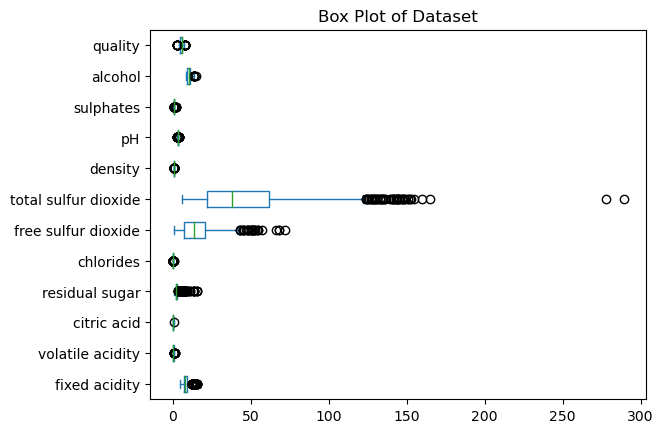

In [353]:
# creating box plots to show outliers in dataset
red_wines.plot.box(vert=False, title="Box Plot of Dataset")

##### NOTE - Because outliers are mostly grouped together, I will not be removing the outliers from this dataset


## Creating training set and test set

In [354]:
# label values assigned to variable y
y= red_wines['quality']

# all features without labels assigned to variable X
X=red_wines.drop(columns=['quality'])

# Splits data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, shuffle=True)

## Descision Tree Classifier

In [355]:
# Creation and training of Descision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [356]:
# Training accuracy
print('Descision tree training accuracy: ', clf.score(X_train, y_train))

Descision tree training accuracy:  1.0


In [357]:
# Testing accuracy
print('Descision tree test accuracy: ', clf.score(X_test, y_test))

Descision tree test accuracy:  0.625


##### Try again with use of scaling

In [358]:
# scale both training and test data
std_X_train = scaleData(X_train)
std_X_test = scaleData(X_test)

In [359]:
# review scaled data
std_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.355926,0.596136,-0.299707,-0.249420,-0.225593,1.526939,2.615802,-0.615580,-0.282933,-1.246457,-0.500227
1,-0.184400,-0.619949,-0.504776,-0.395888,-0.316520,-0.937537,-0.865646,0.239978,-0.153253,-0.285288,-1.154680
2,-1.842485,0.292114,-1.376319,-0.615590,-0.975740,-0.179237,1.192949,-2.198362,1.597421,1.697122,2.304572
3,1.473684,-0.785779,1.033241,-0.542356,0.706408,-0.937537,-0.986739,0.774701,-0.088413,0.555734,-0.593720
4,1.988262,-1.117438,1.135776,0.629390,0.138114,3.612264,1.011308,1.844149,-0.088413,0.615807,0.247719
...,...,...,...,...,...,...,...,...,...,...,...
1274,1.130632,0.319753,0.776905,0.189985,0.069919,1.811301,0.799394,1.202480,-0.218093,0.255369,-0.874200
1275,0.959106,-1.172715,1.648448,-0.249420,-0.225593,-1.221899,-0.956466,1.416370,-0.736811,0.735953,-0.780707
1276,2.502839,0.375029,1.956052,-0.176186,-0.543837,-0.937537,-0.653731,1.576787,-1.839087,-0.525580,-0.500227
1277,-1.442257,0.817242,-1.273785,-0.542356,0.001724,0.484276,1.435137,-1.257249,1.467741,-0.825946,-0.406734


In [360]:
# train decsion tree classifier with scaled data
clf = clf.fit(std_X_train, y_train)

In [361]:
# Training accuracy
print("Decision Tree with scaled data training accuracy: ", clf_scaled.score(std_X_train, y_train))

Decision Tree with scaled data training accuracy:  1.0


In [362]:
# Test accuracy
print("Decision Tree with scaled data test accuracy: ", clf_scaled.score(std_X_test, y_test))

Decision Tree with scaled data test accuracy:  0.5875


##### Note - The decision tree algorithm preformed worse with scaling the data than it did without it.

### Visualizing the tree

In [363]:
# text layout of tree
text_tree = tree.export_text(clf)
print(text_tree)

|--- feature_10 <= 0.08
|   |--- feature_6 <= 1.09
|   |   |--- feature_9 <= -0.74
|   |   |   |--- feature_1 <= -1.17
|   |   |   |   |--- feature_2 <= 0.55
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_2 >  0.55
|   |   |   |   |   |--- class: 6
|   |   |   |--- feature_1 >  -1.17
|   |   |   |   |--- feature_10 <= -0.73
|   |   |   |   |   |--- feature_10 <= -1.20
|   |   |   |   |   |   |--- feature_9 <= -1.04
|   |   |   |   |   |   |   |--- feature_8 <= 0.11
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- feature_8 >  0.11
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_9 >  -1.04
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_10 >  -1.20
|   |   |   |   |   |   |--- feature_10 <= -0.83
|   |   |   |   |   |   |   |--- feature_9 <= -0.80
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_9 >  -0.80
|   |   |   |   |   |   |   |   |--- 

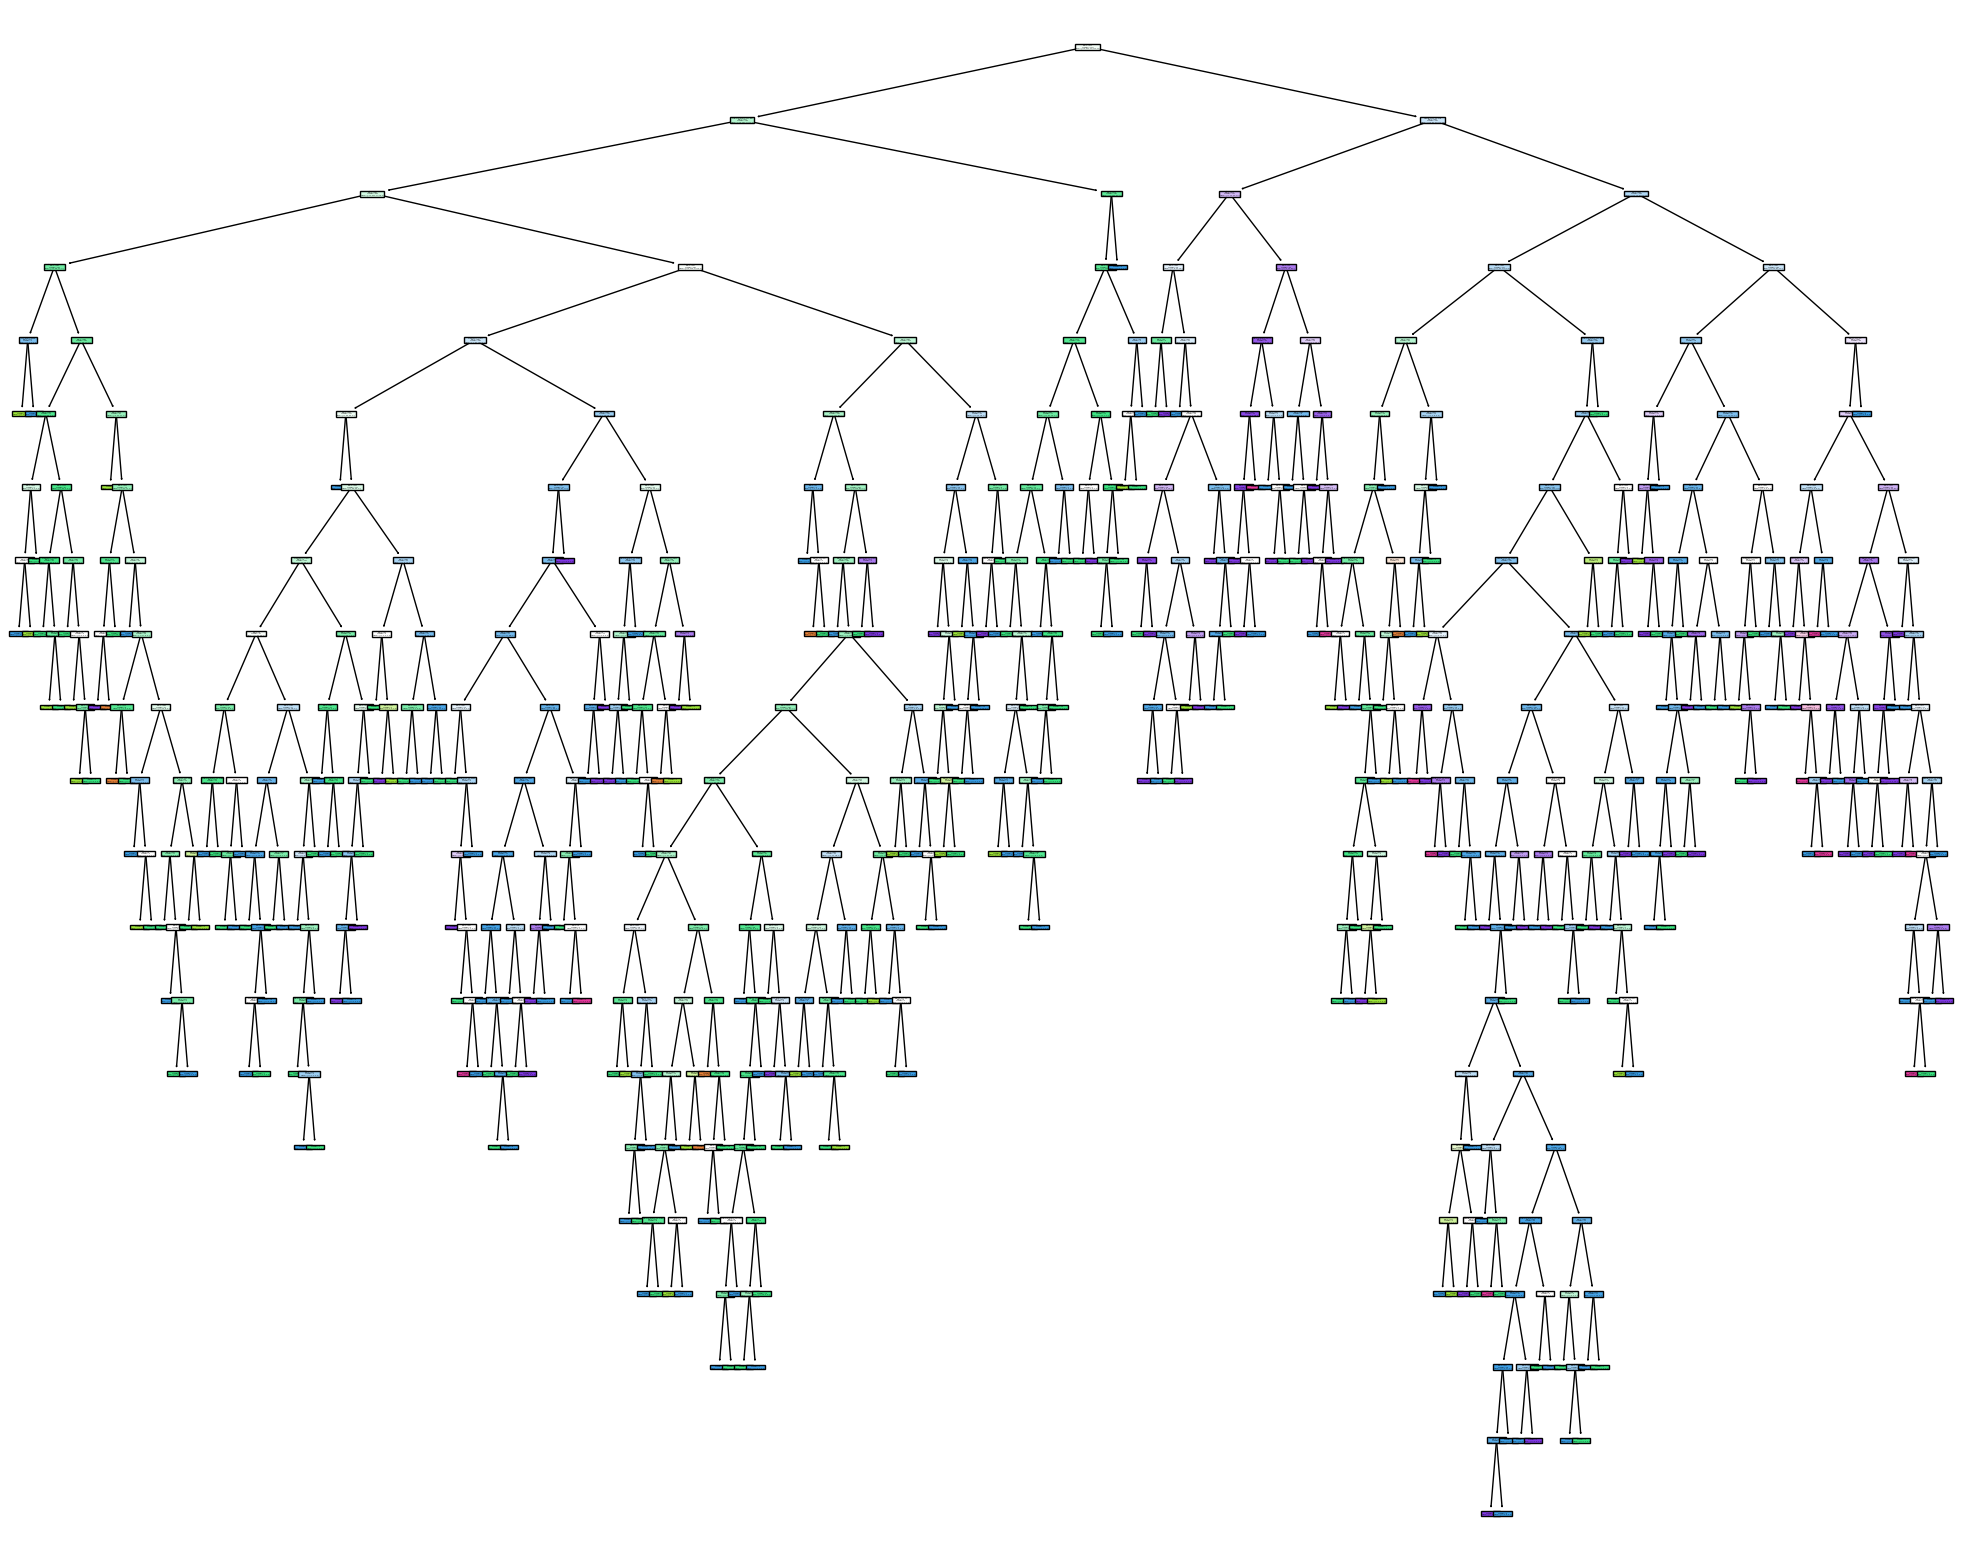

In [364]:
# decision tree plot
plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=features, filled=True)



## Random Forest Classifier

In [365]:
# Creation and training of Random Forest Classifier
rnd_clf = RandomForestClassifier(max_leaf_nodes=30, n_jobs=-1, random_state=27)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_jobs=-1, random_state=27)

In [366]:
# training accuracy
print("Random Forest training accuracy :", rnd_clf.score(X_train, y_train))

Random Forest training accuracy : 0.7357310398749023


In [367]:
# test accuracy
print( "Random Forest test accuracy :", rnd_clf.score(X_test, y_test))

Random Forest test accuracy : 0.659375


## KNeighbors Classifier

In [368]:
# Creation and training of KNeighbors classifier
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [369]:
# training accuracy
print("KNeighbors training accuracy: ", knn_clf.score(X_train, y_train))

KNeighbors training accuracy:  0.6700547302580141


In [370]:
# Test accuracy
print("KNeighbors test accuracy: ", knn_clf.score(X_test, y_test))

KNeighbors test accuracy:  0.490625


##### Try again with use of scaling

In [371]:
# training KNeighbors classifier with scaled data
knn_clf.fit(std_X_train, y_train)

KNeighborsClassifier()

In [372]:
# training accuracy
print("KNeighbors with scaled data training accuracy: ", knn_clf.score(std_X_train, y_train))

KNeighbors with scaled data training accuracy:  0.7044566067240031


In [373]:
# test accuracy
print("KNeighbors with scaled data test accuracy: ", knn_clf.score(std_X_test, y_test))

KNeighbors with scaled data test accuracy:  0.521875
